In [1]:
# Author: Kristine M. L. Krighaar
# Name: BIFROST Guide figures
# 4th Jan 2023


import mcstasscript as ms
my_configurator = ms.Configurator()
my_configurator.set_mcrun_path("/Applications/McStas-3.2.app/Contents/Resources/mcstas/3.2/bin/")
my_configurator.set_mcstas_path("/Applications/McStas-3.2.app/Contents/Resources/mcstas/3.2/")

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
#from celluloid import Camera
import math
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl
#mpl.rcParams['lines.linewidth'] = 0.3
mpl.rcParams['errorbar.capsize'] = 2
mpl.rcParams['lines.markersize'] = 15
mpl.rcParams['font.size']        = 18 # standard er 45
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Import necessary packages
mpl.rcParams['font.family'] = 'lmodern'  # Choose the font (e.g., Latin Modern)
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'



def rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
    yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr

## Read information about the placements of all components in the primary spectrometer

In [3]:
import pandas as pd
df = pd.read_csv('BIFROST_primary_spectrometer_component_placements_no_monitors.txt', sep='AT', names = ['Component','location'])

loc = df["location"].to_numpy()

locations = np.array([])

for i in range(len(loc)):
    lst = loc[i]
    lst = lst.replace('(','').replace(')','').replace(' ', '')
    lst = lst.split(',')
    lst = np.asarray(lst).astype(float)
    locations = np.append(locations, lst)


locations = np.reshape(locations,(-1,3))

print(df.loc[8])

Component    Component               curved_guide_1_0 
location                        (-0.0309895,0,6.38045)
Name: 8, dtype: object


/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_34447/181879640.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('BIFROST_primary_spectrometer_component_placements_no_monitors.txt', sep='AT', names = ['Component','location'])


## Parameters for the 1st element: Elliptical guide

In [4]:

ep1_guide_l = 4.39553

ep1_width = 0.069634
ep1_foci_in_x = 3.4578
ep1_foci_out_x = 0.415155

ep1_height = 0.04862
ep1_foci_in_y = 1.36
ep1_foci_out_y = 3.487681

ep1_start = 0

## m-values

ep1_m_matrix = np.array([[3.000000 , 3.500000 , 0.488444],
[3.000000 , 3.500000 , 0.488444],
[2.500000 , 3.000000 , 0.488444],
[2.500000 , 3.000000 , 0.488444],
[2.500000 , 2.500000 , 0.488444],
[2.000000 , 2.500000 , 0.488444],
[1.500000 , 2.500000 , 0.488444],
[1.500000 , 2.500000 , 0.061219],
[0.000000 , 0.000000 , 0.023490],
[1.500000 , 2.000000 , 0.403736],
[1.500000 , 2.000000 , 0.076264],
[0.000000 , 0.000000 , 0.015000],
[1.500000 , 2.000000 , 0.396710]])

ep1_m_sides = ep1_m_matrix[:,0]
ep1_m_Top_bottom = ep1_m_matrix[:,1]
ep1_seglength = ep1_m_matrix[:,2]

#ep1_mvaluesright = np.array([3.000000, 3.000000, 2.500000, 2.500000, 2.500000, 2.000000, 1.500000, 1.500000, 0, 1.500000, 1.500000, 0, 1.5])
#ep1_mvaluesleft = np.array([3.000000, 3.000000, 2.500000, 2.500000, 2.500000, 2.000000, 1.500000, 1.500000, 0, 1.500000, 1.500000, 0, 1.5])
#ep1_mvaluestop = np.array([3.500000, 3.500000, 3.000000, 3.000000, 2.500000, 2.500000, 2.500000, 2.500000, 0, 2.000000, 2.000000, 0, 2.000000])
#ep1_mvaluesbottom = np.array([3.500000, 3.500000, 3.000000, 3.000000, 2.500000, 2.500000, 2.500000, 2.500000, 0, 2.000000, 2.000000, 0, 2.000000])
#ep1_seglength = np.array([0.488444444444444, 0.488444444444444, 0.488444444444444, 0.488444444444444, 0.488444444444444, 0.488444444444444, 0.488444444444444, 0.061218888888892, 0.02349, 0.403735556, 0.076264444, 0.015, 0.39671])

#Have checked that the m-list are the same length

## Parameters for the 2nd element: Curved guide

In [5]:

benderAngle =  0.01886551 # Mads numbers = 0.0183513513514;

cv_start = 4.477237

cv_movez = 0.500 + 6e-5
cv_movex = 7.57345916228e-10

# Section 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36 
cv1_l = 0.5
cv1_w1 = 0.029534
cv1_w2 = 0.029534
cv1_h1 = 0.047514
cv1_h2 = 0.047514

cv1_mleft = 3.000000
cv1_mright = 3.500000
cv1_mtop =2.500000
cv1_mbottom = 2.500000

# Section 5 (Before chopper)
cv5_l = 0.13
cv5_w1 = 0.029534
cv5_w2 = 0.029534
cv5_h1 = 0.047514
cv5_h2 = 0.047514

cv5_mleft = 3.000000
cv5_mright = 3.500000
cv5_mtop =2.500000
cv5_mbottom = 2.500000

# Section 5 (After chopper)

cv51_movez = 0.17 # relative curvedguide5_before_chopper and is neither rotated or shifted

cv51_l = 0.33
cv51_w1 = 0.029534
cv51_w2 = 0.029534
cv51_h1 = 0.047514
cv51_h2 = 0.047514

cv51_mleft = 3.000000
cv51_mright = 3.500000
cv51_mtop =2.500000
cv51_mbottom = 2.500000

cv6_movez = 0.33 + 6e-5

# Section 18 (Before chopper)
cv18_l = 0.07
cv18_w1 = 0.029534
cv18_w2 = 0.029534
cv18_h1 = 0.047514
cv18_h2 = 0.047514

cv18_mleft = 3.000000
cv18_mright = 3.500000
cv18_mtop =2.500000
cv18_mbottom = 2.500000

# Section 18 (After chopper)
cv181_movez = 0.11 # relative curvedguide18_before_chopper and is neither rotated or shifted

cv181_l = 0.39
cv181_w1 = 0.029534
cv181_w2 = 0.029534
cv181_h1 = 0.047514
cv181_h2 = 0.047514

cv181_mleft = 3.000000
cv181_mright = 3.500000
cv181_mtop =2.500000
cv181_mbottom = 2.500000

cv19_movez = 0.39

## Parameters for the 3rd element: Expanding elliptical

In [6]:

ep2_guide_l = 24.9288

ep2_width = 0.06
ep2_foci_in_x = 3.709727
ep2_foci_out_x = 28.638527

ep2_height = 0.090
ep2_foci_in_y = 4.423828
ep2_foci_out_y = 29.352628

# List of m-values 

monigap_length = 0.02

ep2_m_matrix = np.array([[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.000000 , 0.500000],
[0.000000 , 0.000000 , 0.020000],
[2.000000 , 2.000000 , 0.480000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[2.000000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.428800]])

ep2_m_sides = ep2_m_matrix[:,0]
ep2_m_Top_bottom = ep2_m_matrix[:,1]
ep2_seglength = ep2_m_matrix[:,2]



#ep2_mvaluesright = np.array([2.500000, 2.500000, 2.500000, 2.500000, 2.500000, 2.500000, 2.500000, 0, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5])
#ep2_mvaluesleft = np.array([2.500000, 2.500000, 2.500000, 2.500000, 2.500000, 2.500000, 2.500000, 0, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5])
#ep2_mvaluestop = np.array([2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 0, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000])
#ep2_mvaluesbottom = np.array([2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 0, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 2.000000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000, 1.500000])
#ep2_seglength = np.array([0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.02, 0.48, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.4288])

# I have checked that the m-values lists have the same lengths]

## Parameters for the 4th element: Strainght section

In [7]:

st1_l = 28.676516
st1_w1 = 0.06
st1_w2 = 0.06
st1_h1 = 0.09
st1_h2 = 0.09

st1_mleft = 1.5
st1_mright = 1.5
st1_mtop = 1.0
st1_mbottom = 1.0


st2_l = 61.283484
st2_w1 = 0.06
st2_w2 = 0.06
st2_h1 = 0.09
st2_h2 = 0.09

st2_mleft = 1.5
st2_mright = 1.5
st2_mtop = 1.0
st2_mbottom = 1.0

## Parameters for the 5th element: Focusing ellipse

In [8]:
# Part 1
ep3_1_guide_l = 22.1144#19.6432

ep3_1_width = 0.06
ep3_1_foci_in_x = 24.364542+5
ep3_1_foci_out_x = 4.721342

ep3_1_height = 0.09
ep3_1_foci_in_y = 23.034433
ep3_1_foci_out_y = 3.391233

#ep3_1_mvaluesright = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.50, 2.50, 2.50])
#ep3_1_mvaluesleft = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.50, 2.50, 2.50])
#ep3_1_mvaluestop = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.00, 2.50, 2.50])
#ep3_1_mvaluesbottom = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.00, 2.50, 2.50])
#ep3_1_seglength = np.array([0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000 ,0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.01580, 0.48420, 0.50000, 0.50000, 0.14320])


#ep3_1_mvaluesright = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.50, 2.50, 2.50, 2.50,  3.00, 3.00, 3.00, 3.00, 3.00, 3.5, 3.5])
#ep3_1_mvaluesleft = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.50, 2.50, 2.50, 2.50,  3.00, 3.00, 3.00, 3.00, 3.00, 3.5, 3.5])
#ep3_1_mvaluestop = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.00, 2.50, 2.50, 2.50,  3.00, 3.00, 3.0, 3.5, 3.50, 3.50, 3.50])
#ep3_1_mvaluesbottom = np.array([1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 0, 2.00, 2.00, 2.50, 2.50, 2.50,  3.00, 3.00, 3.0, 3.5, 3.50, 3.50, 3.50])
#ep3_1_seglength = np.array([0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000 ,0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.50000, 0.01580, 0.48420, 0.50000, 0.50000, 0.14320, 0.31680, 0.50000, 0.46320, 0.0596, 0.500, 0.06670, 0.50000, 0.0047])


ep3_m_matrix = np.array([[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 1.500000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[1.500000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[2.000000 , 2.000000 , 0.500000],
[0.000000 , 0.000000 , 0.015800],  # 2 cm hole for Diw jaw 3
[2.000000 , 2.000000 , 0.484200],
[2.500000 , 2.000000 , 0.500000],
[2.500000 , 2.500000 , 0.500000],
[2.500000 , 2.500000 , 0.143200],
[0.000000 , 0.000000 , 0.020000],  # 2 cm hole for Diw jaw 3 
[2.500000 , 2.500000 , 0.316800],
[3.000000 , 3.000000 , 0.500000],
[3.000000 , 3.000000 , 0.463200],
[0.000000 , 0.000000 , 0.020000],   # 2 cm hole for Diw jaw 2 
[3.000000 , 3.000000 , 0.059600],
[3.000000 , 3.500000 , 0.500000],
[0.000000 , 0.000000 , 0.020000],   # 2 cm hole for Diw jaw 1 
[3.000000 , 3.500000 , 0.066700],
[3.500000 , 3.500000 , 0.500000],
[3.500000 , 3.500000 , 0.004700]])


ep3_1_m_sides = ep3_m_matrix[:,0]
ep3_1_m_Top_bottom = ep3_m_matrix[:,1]
ep3_1_seglength = ep3_m_matrix[:,2]


# Part 2
"""ep3_2_guide_l = 1.28

ep3_2_width = 0.06
ep3_2_foci_in_x = 44.027742
ep3_2_foci_out_x = 3.421342

ep3_2_height = 0.09
ep3_2_foci_in_y = 42.697633
ep3_2_foci_out_y = 2.091233


ep3_2_mvaluesright = np.array([2.50,  3.00, 3.00])
ep3_2_mvaluesleft = np.array([2.50,  3.00, 3.00])
ep3_2_mvaluestop = np.array([2.50, 3.00, 3.00])
ep3_2_mvaluesbottom = np.array([2.50, 3.00, 3.00])
ep3_2_seglength = np.array([0.31680, 0.50000, 0.46320]) 

print(np.sum(ep3_2_seglength))

# Part 3
ep3_3_guide_l = 0.56959

ep3_3_width = 0.06
ep3_3_foci_in_x = 45.327742
ep3_3_foci_out_x = 2.841742

ep3_3_height = 0.09
ep3_3_foci_in_y = 43.997633
ep3_3_foci_out_y = 1.511633


ep3_3_mvaluesright = np.array([3.00, 3.00])
ep3_3_mvaluesleft = np.array([3.00, 3.00])
ep3_3_mvaluestop = np.array([3.0, 3.5])
ep3_3_mvaluesbottom = np.array([3.0, 3.5])
ep3_3_seglength = np.array([0.0596, 0.500])

# Part 4
ep3_4_guide_l = 0.5714

ep3_4_width = 0.06
ep3_4_foci_in_x = 45.907342
ep3_4_foci_out_x = 2.250342

ep3_4_height = 0.09
ep3_4_foci_in_y = 44.577233
ep3_4_foci_out_y = 0.920233

ep3_4_mvaluesright = np.array([3.00, 3.5, 3.5])
ep3_4_mvaluesleft = np.array([3.00, 3.5, 3.5])
ep3_4_mvaluestop = np.array([3.50, 3.50, 3.50])
ep3_4_mvaluesbottom = np.array([3.50, 3.50, 3.50])
ep3_4_seglength = np.array([0.06670, 0.50000, 0.0047])
"""


'ep3_2_guide_l = 1.28\n\nep3_2_width = 0.06\nep3_2_foci_in_x = 44.027742\nep3_2_foci_out_x = 3.421342\n\nep3_2_height = 0.09\nep3_2_foci_in_y = 42.697633\nep3_2_foci_out_y = 2.091233\n\n\nep3_2_mvaluesright = np.array([2.50,  3.00, 3.00])\nep3_2_mvaluesleft = np.array([2.50,  3.00, 3.00])\nep3_2_mvaluestop = np.array([2.50, 3.00, 3.00])\nep3_2_mvaluesbottom = np.array([2.50, 3.00, 3.00])\nep3_2_seglength = np.array([0.31680, 0.50000, 0.46320]) \n\nprint(np.sum(ep3_2_seglength))\n\n# Part 3\nep3_3_guide_l = 0.56959\n\nep3_3_width = 0.06\nep3_3_foci_in_x = 45.327742\nep3_3_foci_out_x = 2.841742\n\nep3_3_height = 0.09\nep3_3_foci_in_y = 43.997633\nep3_3_foci_out_y = 1.511633\n\n\nep3_3_mvaluesright = np.array([3.00, 3.00])\nep3_3_mvaluesleft = np.array([3.00, 3.00])\nep3_3_mvaluestop = np.array([3.0, 3.5])\nep3_3_mvaluesbottom = np.array([3.0, 3.5])\nep3_3_seglength = np.array([0.0596, 0.500])\n\n# Part 4\nep3_4_guide_l = 0.5714\n\nep3_4_width = 0.06\nep3_4_foci_in_x = 45.907342\nep3_4_fo

## FUNCTIONS - Drawing ellipses, Rotation ellipse and assigning m-value ellipse

In [9]:
def ellipse(width, guide_l, foci_in, foci_out):
    l = guide_l
    w = width
    c = (foci_in + guide_l + foci_out) / 2
    x0 = c - foci_in
    y0 = w/2
    d1 = np.sqrt((x0-c)**2 + y0**2)
    d2 = np.sqrt((x0+c)**2 + y0**2)
    a = (d1 + d2)/2
    b = np.sqrt(a**2 - c**2)
    x = np.linspace(-c + foci_in, c - foci_out, 10000)
    y = 2 * np.sqrt(b**2 - x**2 * b**2 / a**2)
    return x,y

import math

def rotate_line(x1, y1, x2, y2, angle, pivot_x, pivot_y):
  # Convert the angle to radians
  angle_rad = math.radians(angle)

  # Calculate the sine and cosine of the angle
  cos_angle = math.cos(angle_rad)
  sin_angle = math.sin(angle_rad)

  # Rotate the line's start and end points around the pivot point
  rotated_x1 = cos_angle * (x1 - pivot_x) - sin_angle * (y1 - pivot_y) + pivot_x
  rotated_y1 = sin_angle * (x1 - pivot_x) + cos_angle * (y1 - pivot_y) + pivot_y
  rotated_x2 = cos_angle * (x2 - pivot_x) - sin_angle * (y2 - pivot_y) + pivot_x
  rotated_y2 = sin_angle * (x2 - pivot_x) + cos_angle * (y2 - pivot_y) + pivot_y

  # Return the rotated line's start and end points
  return np.array([rotated_x1, rotated_x2]), np.array([rotated_y1, rotated_y2])


def rotate_around_point_highperf(xy, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "high performance" version since we're caching some
    values that are needed >1 time. It's less readable than the previous
    function but it's faster.
    """
    x, y = xy
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = math.cos(radians)
    sin_rad = math.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y

    return qx, qy

def m_value_list(segmenter, lenghts_list, m_values):
    """
    The function takes the input parameters,
    segmenter = an array over the segments of the guide in the form (x1, y1) og (x2,y2)
    lenghts_list = an array over how long each segment over the different m-values are
    m_values = Which m-value is for each of the length pieces in lengths_list
    
    1) Sets the start of the guide for 0
    2) calculates the lengths into an relative distance from the guide beginning. 
    3) makes an array of zeros that is the length og segments
    4) Every end element in segment is compared to distance interval and the cooresponding m-values is added to the index.
    
    returns: m_val_segment = the corresponding m-value for each of the segment pieces in the guide 
    """
    segmenter = segmenter-abs(segmenter[0,0,0])
    m_start_points = []
    for i in range(len(lenghts_list)):
        m_start_points.append(np.sum(lenghts_list[0:i]))
         
    m_start_points = np.asarray(m_start_points)
    
    #m_start_points = m_start_points[1]+m_start_points
    
    m_val_segment = np.zeros(len(segmenter))
    
    for j in range(len(m_start_points)-1):
        for i in range(len(segmenter)):
            if segmenter[i,0,0]>=m_start_points[j] and segmenter[i,0,0]<=m_start_points[j+1]:
                #print(m_values[j])
                m_val_segment[i]+=m_values[j]
                
    return m_val_segment
    

In [10]:
x_start, y_start = locations[0::, (2,0)].T


## Testing drawing and rotating first ellipse - side view

/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_34447/1927375161.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_34447/1927375161.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift


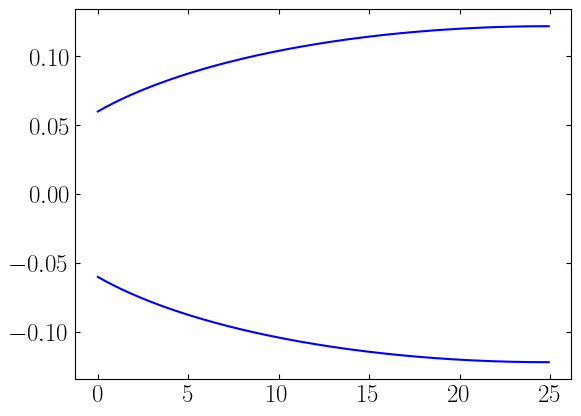

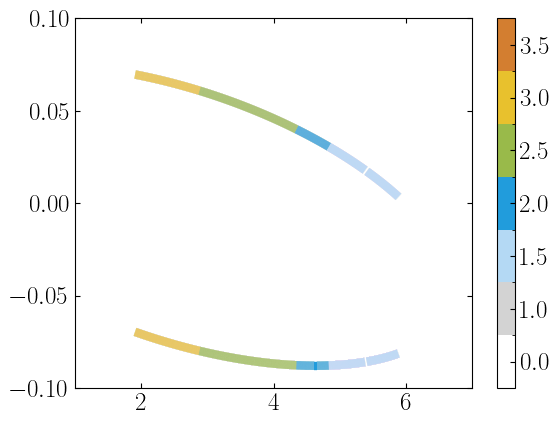

In [11]:
cmap = ListedColormap(['#FFFFFF', '#d3d3d3','#B4D9F4','#219CDC', '#99BA4A','#E8C12D', '#D37E30'])
norm = BoundaryNorm([-0.75, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75], cmap.N)


############# Plotting raw ellipse element ##############

x_ellip, y_ellip = ellipse(ep1_width, ep1_guide_l, ep1_foci_in_x, ep1_foci_out_x)
x_ellip2,y_ellip2 = ellipse(ep2_width, ep2_guide_l, ep2_foci_in_x, ep2_foci_out_x)


plt.figure()
plt.plot(x_ellip2 - x_ellip2[0] ,y_ellip2,'b-', label = 'guide')
plt.plot(x_ellip2 - x_ellip2[0],-y_ellip2,'b-')
#cmap = ListedColormap(['#FFFFFF', '#15375F', '#B6BCD2','#219CDC', '#B4D9F4', '#ECF2DB', '#99BA4A', '#D37E30'])

############### Testing rotation #################

ellipse_angle = np.arctan2(np.diff(y_start[3:5]), np.diff(x_start[3:5]))

x_ellip1,y_ellip1 = rotate_matrix(x_ellip - x_ellip[0], y_ellip, ellipse_angle, 0, 0, units="RADIANS")
x_ellip1b,y_ellip1b = rotate_matrix(x_ellip - x_ellip[0], -y_ellip, ellipse_angle, 0, 0, units="RADIANS")

############ How to colorcode the guide segments and plot them #############

# Finding all the nessecary information to make the colorcoding
x_ellip1 = x_ellip1+locations[3,2] 
points = np.array([x_ellip1, y_ellip1]).T.reshape(-1, 1, 2) 
segments = np.concatenate([points[:-1], points[1:]], axis=1)
m_value_elip1_left = m_value_list(segments, ep1_seglength, ep1_m_sides)


x_ellip1b = x_ellip1b+locations[3,2] 
points_b = np.array([x_ellip1b, y_ellip1b]).T.reshape(-1, 1, 2) 
segments_b = np.concatenate([points_b[:-1], points_b[1:]], axis=1)
m_value_elip1_right = m_value_list(segments_b, ep1_seglength, ep1_m_sides)


# How to do the plotting fr two line elements

fig, axs = plt.subplots()
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc_b = LineCollection(segments_b, cmap=cmap, norm=norm)
lc.set_array(m_value_elip1_left)
lc_b.set_array(m_value_elip1_right)
lc.set_linewidth(6)
lc_b.set_linewidth(6)
line = axs.add_collection(lc)
line_b = axs.add_collection(lc_b)


fig.colorbar(line, ax=axs, ticks=[0, 1, 1.5, 2, 2.5, 3, 3.5])
axs.set_xlim(1, 7)
axs.set_ylim(-0.1, 0.1)
plt.show()

#plt.figure()
#plt.plot(locations[3,2]+(x_ellip1) ,locations[3,0]+y_ellip1,'b-', label = 'guide')
#plt.plot(locations[3,2]+(x_ellip1b),locations[3,0]+y_ellip1b,'b-')

## Seeing all positions from McStas - Top view

[6.38045 6.8805  7.38055 7.8806 ]
[ 8.55065  8.88064  9.3807   9.88076 10.3808  10.8809  11.3809  11.881
 12.3811  12.8811  13.3812  13.8812  14.3813 ]


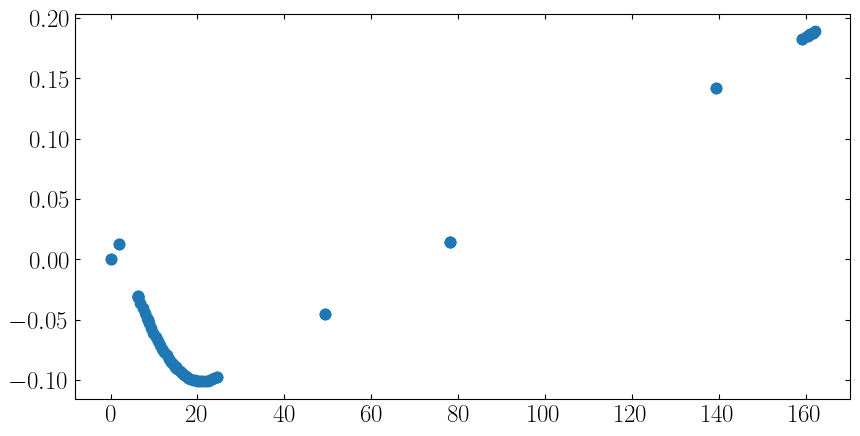

In [12]:
x_centres_1, y_centres_1 = locations[8:12, (2,0)].T

print(x_centres_1)

x_centres_2, y_centres_2 = locations[14:27, (2,0)].T

print(x_centres_2)

x_centres_3, y_centres_3 = locations[29:49, (2,0)].T
plt.figure(figsize=(10,5))
plt.plot(*locations[:, (2,0)].T, ".");
#plt.plot(x_centres, y_centres + cv1_w1/2);
#plt.plot(x_centres, y_centres - cv1_w1/2);

#plt.axis("equal")
#plt.xlim(15,16)

## Top view calculations of the guide

In [13]:

width_factor = 1

angle_1 = np.arctan2(np.diff(y_centres_1), np.diff(x_centres_1))[:-1]
angle_1 = np.concatenate([angle_1[:1], angle_1, angle_1[-1:]]) # add artificial edges
width_1 = cv1_w1*(1/np.cos(angle_1 * width_factor))

angle_2 = np.arctan2(np.diff(y_centres_2), np.diff(x_centres_2))[:-1]
angle_2 = np.concatenate([angle_2[:1], angle_2, angle_2[-1:]]) # add artificial edges
width_2 = cv1_w1*(1/np.cos(angle_2 * width_factor))

angle_3 = np.arctan2(np.diff(y_centres_3), np.diff(x_centres_3))[:-1]
angle_3 = np.concatenate([angle_3[:1], angle_3, angle_3[-1:]]) # add artificial edges
width_3 = cv1_w1*(1/np.cos(angle_3 * width_factor))

#### 1st Ellipse ######
"""
ep1_guide_l = 4.39553
ep1_width = 0.069634
ep1_foci_in_x = 3.4578
ep1_foci_out_x = 0.415155
"""
x_ellip, y_ellip = ellipse(ep1_width/2, ep1_guide_l, ep1_foci_in_x, ep1_foci_out_x)

ellipse_angle = np.arctan2(np.diff(y_start[3:5]), np.diff(x_start[3:5]))

x_ellip1,y_ellip1 = rotate_matrix(x_ellip - x_ellip[0], y_ellip, ellipse_angle, 0, 0, units="RADIANS")
x_ellip1b,y_ellip1b = rotate_matrix(x_ellip - x_ellip[0], -y_ellip, ellipse_angle, 0, 0, units="RADIANS")

x_ellip1 = x_ellip1+locations[3,2] 
y_ellip1 = y_ellip1+locations[3,0]
points = np.array([x_ellip1, y_ellip1]).T.reshape(-1, 1, 2) 
segments = np.concatenate([points[:-1], points[1:]], axis=1)
m_value_elip1_left = m_value_list(segments, ep1_seglength, ep1_m_sides)

x_ellip1b = x_ellip1b+locations[3,2] 
y_ellip1b = y_ellip1b+locations[3,0]
points_b = np.array([x_ellip1b, y_ellip1b]).T.reshape(-1, 1, 2) 
segments_b = np.concatenate([points_b[:-1], points_b[1:]], axis=1)
m_value_elip1_right = m_value_list(segments_b, ep1_seglength, ep1_m_sides)

#### 2nd Ellipse ######

"""
ep2_guide_l = 24.9288

ep2_width = 0.06
ep2_foci_in_x = 3.709727
ep2_foci_out_x = 28.638527
"""

x_ellip2, y_ellip2 = ellipse(ep2_width/4, ep2_guide_l, ep2_foci_in_x, ep2_foci_out_x)

ellipse_angle2 = np.arctan2(np.diff(y_start[49:51]), np.diff(x_start[49:51]))

x_ellip2t,y_ellip2t = rotate_matrix(x_ellip2 - x_ellip2[0], y_ellip2, ellipse_angle2, 0, 0, units="RADIANS")
x_ellip2b,y_ellip2b = rotate_matrix(x_ellip2 - x_ellip2[0], -y_ellip2, ellipse_angle2, 0, 0, units="RADIANS")


x_ellip2t = x_ellip2t+locations[49,2]
y_ellip2t = y_ellip2t+locations[49,0]
points_2t = np.array([x_ellip2t, y_ellip2t]).T.reshape(-1, 1, 2) 
segments_2t = np.concatenate([points_2t[:-1], points_2t[1:]], axis=1)
m_value_elip2t_left = m_value_list(segments_2t, ep2_seglength, ep2_m_sides)

x_ellip2b = x_ellip2b+locations[49,2]
y_ellip2b = y_ellip2b+locations[49,0]
points_2b = np.array([x_ellip2b, y_ellip2b]).T.reshape(-1, 1, 2) 
segments_2b = np.concatenate([points_2b[:-1], points_2b[1:]], axis=1)
m_value_elip2b_right = m_value_list(segments_2b, ep2_seglength, ep2_m_sides)

#### 3rd Ellipse part 1 ######

"""
ep3_1_guide_l = 19.6432

ep3_1_width = 0.06
ep3_1_foci_in_x = 24.364542
ep3_1_foci_out_x = 4.721342
"""

x_ellip3_1, y_ellip3_1 = ellipse(ep3_1_height/4, ep3_1_guide_l, ep3_1_foci_in_x, ep3_1_foci_out_x)

ellipse_angle3_1 = np.arctan2(np.diff(y_start[56:58]), np.diff(x_start[56:58]))

x_ellip3_1t,y_ellip3_1t = rotate_matrix(x_ellip3_1 - x_ellip3_1[0], y_ellip3_1, ellipse_angle3_1, 0, 0, units="RADIANS")
x_ellip3_1b,y_ellip3_1b = rotate_matrix(x_ellip3_1 - x_ellip3_1[0], -y_ellip3_1, ellipse_angle3_1, 0, 0, units="RADIANS")


x_ellip3_1t = locations[56,2]+x_ellip3_1t
y_ellip3_1t = y_ellip3_1t+locations[56,0]
points_3_1t = np.array([x_ellip3_1t, y_ellip3_1t]).T.reshape(-1, 1, 2) 
segments_3_1t = np.concatenate([points_3_1t[:-1], points_3_1t[1:]], axis=1)
m_value_elip3_1t_left = m_value_list(segments_3_1t, ep3_1_seglength, ep3_1_m_sides)

x_ellip3_1b = locations[56,2]+x_ellip3_1b
y_ellip3_1b = y_ellip3_1b+locations[56,0]
points_3_1b = np.array([x_ellip3_1b, y_ellip3_1b]).T.reshape(-1, 1, 2) 
segments_3_1b = np.concatenate([points_3_1b[:-1], points_3_1b[1:]], axis=1)
m_value_elip3_1b_right = m_value_list(segments_3_1b, ep3_1_seglength, ep3_1_m_sides)

####################################
x_ellip3_1_2, y_ellip3_1_2 = ellipse(ep3_1_width/2, ep3_1_guide_l, ep3_1_foci_in_x, ep3_1_foci_out_x)

ellipse_angle3_1_2 = np.arctan2(np.diff(y_start[56:58]), np.diff(x_start[56:58]))

x_ellip3_1t_2,y_ellip3_1t_2 = rotate_matrix(x_ellip3_1_2 - x_ellip3_1_2[0], y_ellip3_1_2, ellipse_angle3_1_2, 0, 0, units="RADIANS")
x_ellip3_1b_2,y_ellip3_1b_2 = rotate_matrix(x_ellip3_1_2 - x_ellip3_1_2[0], -y_ellip3_1_2, ellipse_angle3_1_2, 0, 0, units="RADIANS")


x_ellip3_1t_2 = locations[56,2]+x_ellip3_1t_2
y_ellip3_1t_2 = y_ellip3_1t_2+locations[56,0]
points_3_1t_2 = np.array([x_ellip3_1t_2, y_ellip3_1t_2]).T.reshape(-1, 1, 2) 
segments_3_1t_2 = np.concatenate([points_3_1t_2[:-1], points_3_1t_2[1:]], axis=1)
m_value_elip3_1t_left_2 = m_value_list(segments_3_1t_2, ep3_1_seglength, ep3_1_m_sides)

x_ellip3_1b_2 = locations[56,2]+x_ellip3_1b_2
y_ellip3_1b_2 = y_ellip3_1b_2+locations[56,0]
points_3_1b_2 = np.array([x_ellip3_1b_2, y_ellip3_1b_2]).T.reshape(-1, 1, 2) 
segments_3_1b_2 = np.concatenate([points_3_1b_2[:-1], points_3_1b_2[1:]], axis=1)
m_value_elip3_1b_right_2 = m_value_list(segments_3_1b_2, ep3_1_seglength, ep3_1_m_sides)


/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_34447/1927375161.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_34447/1927375161.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift


## Side view calculations of the guide

In [14]:

################## First ellipse
"""
ep1_guide_l = 4.39553

ep1_width = 0.069634
ep1_foci_in_x = 3.4578
ep1_foci_out_x = 0.415155

ep1_height = 0.072498
ep1_foci_in_y = 3.9958
ep1_foci_out_y = 0.37298
"""

side_x_ellip, side_y_ellip = ellipse(ep1_height/4, ep1_guide_l, ep1_foci_in_y, ep1_foci_out_y)
side_x_ellip = (side_x_ellip - side_x_ellip[0])+locations[3,2]
#side_x_ellip = locations[3,2]+side_x_ellip
#side_y_ellip = locations[3,1]+side_y_ellip

side_points = np.array([side_x_ellip, side_y_ellip]).T.reshape(-1, 1, 2) 
side_segments = np.concatenate([side_points[:-1], side_points[1:]], axis=1)
side_m_value_elip_top = m_value_list(side_segments, ep1_seglength, ep1_m_Top_bottom)

side_points_b = np.array([side_x_ellip, -side_y_ellip]).T.reshape(-1, 1, 2) 
side_segments_b = np.concatenate([side_points_b[:-1], side_points_b[1:]], axis=1)
side_m_value_elip_bottom = m_value_list(side_segments_b, ep1_seglength, ep1_m_Top_bottom)

################### Curved section

side_x_centres_1, side_y_centres_1 = locations[8:12, (2,1)].T

side_x_centres_2, side_y_centres_2 = locations[14:27, (2,1)].T

side_x_centres_3, side_y_centres_3 = locations[29:49, (2,1)].T


################### Second ellipse


side_x_ellip2, side_y_ellip2 = ellipse(ep2_height/4, ep2_guide_l, ep2_foci_in_y, ep2_foci_out_y)
side_x_ellip2 = (side_x_ellip2 - side_x_ellip2[0])+locations[49,2]

side_points2 = np.array([side_x_ellip2, side_y_ellip2]).T.reshape(-1, 1, 2) 
side_segments2 = np.concatenate([side_points2[:-1], side_points2[1:]], axis=1)
side_m_value_elip_top2 = m_value_list(side_segments2, ep2_seglength, ep2_m_Top_bottom)

side_points_b2 = np.array([side_x_ellip2, -side_y_ellip2]).T.reshape(-1, 1, 2) 
side_segments_b2 = np.concatenate([side_points_b2[:-1], side_points_b2[1:]], axis=1)
side_m_value_elip_bottom2 = m_value_list(side_segments_b2, ep2_seglength, ep2_m_Top_bottom)


################### Last focusing ellipse section

###### 3_1 ########
side_x_ellip3_1, side_y_ellip3_1 = ellipse(ep3_1_height/4, ep3_1_guide_l, ep3_1_foci_in_y, ep3_1_foci_out_y)
side_x_ellip3_1 = (side_x_ellip3_1 - side_x_ellip3_1[0])+locations[56,2]

side_points3_1 = np.array([side_x_ellip3_1, side_y_ellip3_1]).T.reshape(-1, 1, 2) 
side_segments3_1 = np.concatenate([side_points3_1[:-1], side_points3_1[1:]], axis=1)
side_m_value_elip_top3_1 = m_value_list(side_segments3_1, ep3_1_seglength, ep3_1_m_Top_bottom)

side_points_b3_1 = np.array([side_x_ellip3_1, -side_y_ellip3_1]).T.reshape(-1, 1, 2) 
side_segments_b3_1 = np.concatenate([side_points_b3_1[:-1], side_points_b3_1[1:]], axis=1)
side_m_value_elip_bottom3_1 = m_value_list(side_segments_b3_1, ep3_1_seglength, ep3_1_m_Top_bottom)

## How to do the plotting for two line elements

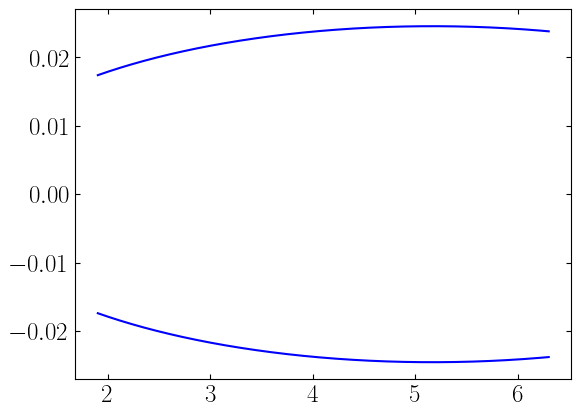

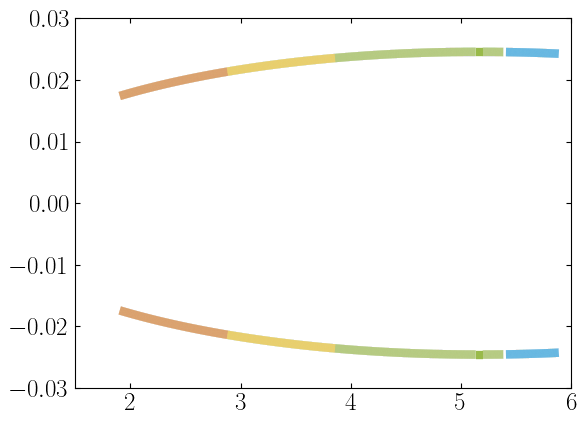

In [15]:
"""
ep1_guide_l = 4.39553

ep1_width = 0.069634
ep1_foci_in_x = 3.4578
ep1_foci_out_x = 0.415155

ep1_height = 0.072498
ep1_foci_in_y = 3.9958
ep1_foci_out_y = 0.37298
"""

side_x_ellip, side_y_ellip = ellipse(ep1_width/4, ep1_guide_l, ep1_foci_in_y, ep1_foci_out_y)
side_x_ellip = (side_x_ellip - side_x_ellip[0])+locations[3,2]
#side_x_ellip = locations[3,2]+side_x_ellip
#side_y_ellip = locations[3,1]+side_y_ellip

side_points = np.array([side_x_ellip, side_y_ellip]).T.reshape(-1, 1, 2) 
side_segments = np.concatenate([side_points[:-1], side_points[1:]], axis=1)
side_m_value_elip_top = m_value_list(side_segments, ep1_seglength, ep1_m_Top_bottom)

side_points_b = np.array([side_x_ellip, -side_y_ellip]).T.reshape(-1, 1, 2) 
side_segments_b = np.concatenate([side_points_b[:-1], side_points_b[1:]], axis=1)
side_m_value_elip_bottom = m_value_list(side_segments_b, ep1_seglength, ep1_m_Top_bottom)



plt.figure()
plt.plot(side_x_ellip ,side_y_ellip,'b-', label = 'guide')
plt.plot(side_x_ellip,-side_y_ellip,'b-')
#plt.ylim(-0.03, 0.03)

#plt.xlim(155, 163)

fig, axs = plt.subplots()
lc = LineCollection(side_segments, cmap=cmap, norm=norm)
lc_b = LineCollection(side_segments_b, cmap=cmap, norm=norm)
lc.set_array(side_m_value_elip_top)
lc_b.set_array(side_m_value_elip_bottom)
lc.set_linewidth(6)
lc_b.set_linewidth(6)
line = axs.add_collection(lc)
line_b = axs.add_collection(lc_b)


#fig.colorbar(line, ax=axs, ticks=[0, 1, 1.5, 2, 2.5, 3, 3.5])
axs.set_xlim(1.5, 6)
axs.set_ylim(-0.03, 0.03)
plt.show()

In [16]:
#print(len(x_centres[0:-2]))
#print(len(y_centres[0:-2]))

## The figure going into the BIFROST article 

[[161.41911452   0.20021372]
 [161.42132619   0.20021566]]
[[161.41916651   0.17521699]
 [161.42137816   0.17522425]]


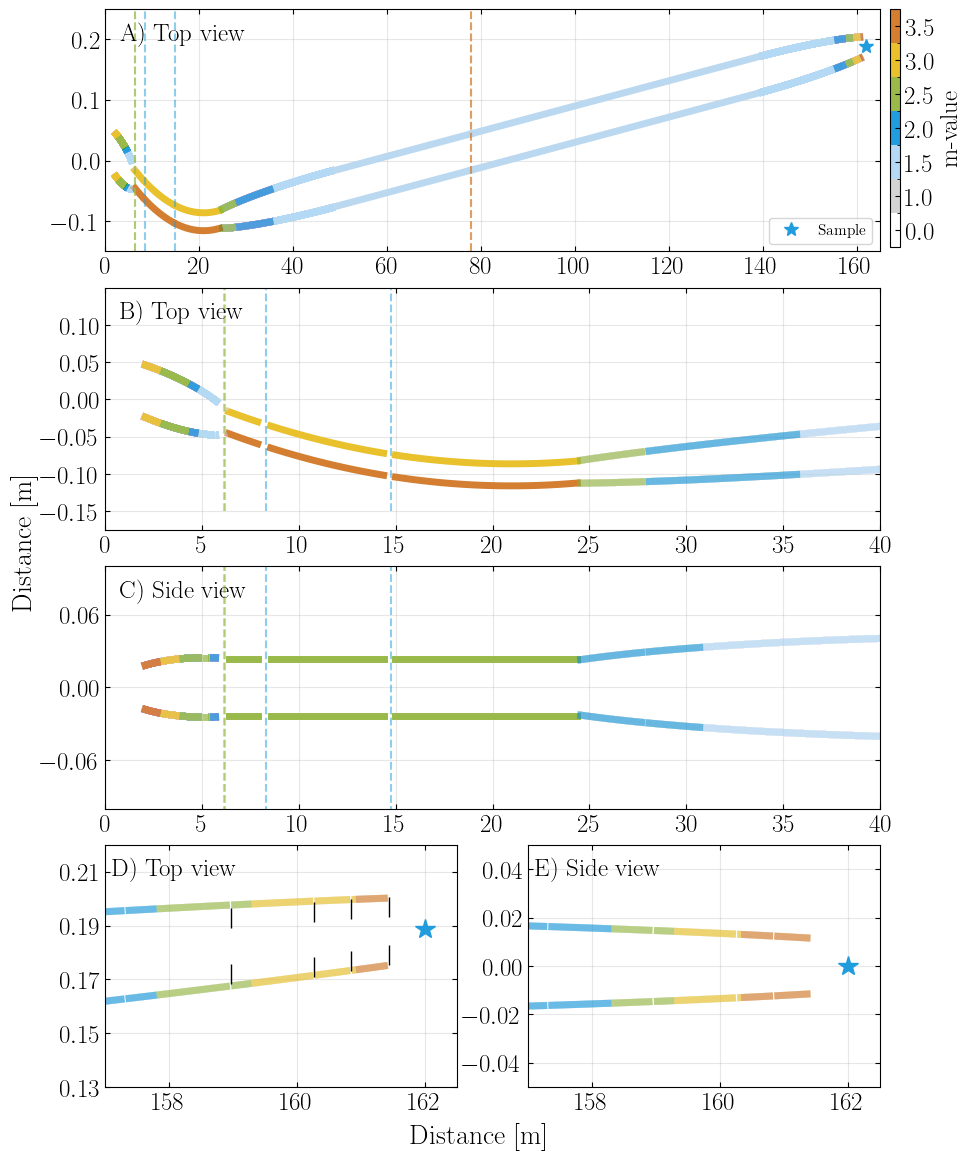

In [29]:
m0, m1, m1p5, m2, m2p5, m3, m3p5 = '#FFFFFF', '#d3d3d3','#bbd8f1','#219CDC', '#99BA4A','#E8C12D', '#D37E30'

lw=5

#fig, axs = plt.subplots(figsize=(20,4))
#plt.plot(*locations[:, (2,0)].T, ".");

fig = plt.figure(figsize=(10,14))

gs = fig.add_gridspec(4,2, wspace=0.2, hspace=0.15)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[3, 1])

# Curved section

ax1.plot(x_centres_1, y_centres_1 + width_1/2, linewidth=lw,  color=m3);
ax1.plot(x_centres_1, y_centres_1 - width_1/2, linewidth=lw, color=m3p5);

ax1.plot(x_centres_2, y_centres_2 + width_2/2, linewidth=lw,  color=m3);
ax1.plot(x_centres_2, y_centres_2 - width_2/2, linewidth=lw, color=m3p5);

ax1.plot(x_centres_3, y_centres_3 + width_3/2, linewidth=lw,  color=m3);
ax1.plot(x_centres_3, y_centres_3 - width_3/2, linewidth=lw, color=m3p5);
ax1.grid(True, alpha=0.3)
# 1st Ellipse
#plt.plot((x_ellip1) ,locations[3,0]+y_ellip1,'b-', linewidth=lw, label = 'guide')
#plt.plot((x_ellip1b),locations[3,0]+y_ellip1b,'b-',linewidth=lw)

lc = LineCollection(segments, cmap=cmap, norm=norm)
lc_b = LineCollection(segments_b, cmap=cmap, norm=norm)
lc.set_array(m_value_elip1_left)
lc_b.set_array(m_value_elip1_right)
lc.set_linewidth(lw)
lc_b.set_linewidth(lw)
line = ax1.add_collection(lc)
line_b = ax1.add_collection(lc_b)


# 2nd Ellipse

lc2 = LineCollection(segments_2t, cmap=cmap, norm=norm)
lc_2b = LineCollection(segments_2b, cmap=cmap, norm=norm)
lc2.set_array(m_value_elip2t_left)
lc_2b.set_array(m_value_elip2b_right)
lc2.set_linewidth(lw)
lc_2b.set_linewidth(lw)
line2 = ax1.add_collection(lc2)
line_2b = ax1.add_collection(lc_2b)


# Straight section
x_straight_1, y_straight_1 = np.array([49.307, 78.0035]), np.array([-0.0454458, 0.0142345])
x_straight_2, y_straight_2 = np.array([78.0436, 139.307]), np.array([0.0142761, 0.141728])

ax1.plot(x_straight_1, y_straight_1 + st1_w1/2, linewidth=lw, color=m1p5);
ax1.plot(x_straight_1, y_straight_1 - st1_w1/2, linewidth=lw, color=m1p5);

ax1.plot(x_straight_2, y_straight_2 + st1_w1/2, linewidth=lw, color=m1p5);
ax1.plot(x_straight_2, y_straight_2 - st1_w1/2, linewidth=lw, color=m1p5);

# 3rd Ellipse part 1

lc3_1 = LineCollection(segments_3_1t_2, cmap=cmap, norm=norm)
lc_3_1b = LineCollection(segments_3_1b_2, cmap=cmap, norm=norm)
lc3_1.set_array(m_value_elip3_1t_left_2)
lc_3_1b.set_array(m_value_elip3_1b_right_2)
lc3_1.set_linewidth(lw)
lc_3_1b.set_linewidth(lw)
line3_1 = ax1.add_collection(lc3_1)
line_3_1b = ax1.add_collection(lc_3_1b)

ax1.plot(0.580+locations[63,2], locations[65,0], '*', markersize=10, label = 'Sample', color=m2)

x_chopper_5 = np.ones(100)*locations[52,2]
y_chopper_5 = np.linspace(-0.15,0.25, 100)



#ax1.plot(x_chopper_5, y_chopper_5, '--', color='grey', alpha=0.5)

# Other general plotting items
#ax1.grid(True, alpha=0.3)
#ax1.set_xlabel('x distance [m]')
#ax1.set_ylabel('y distance [m]')
#ax1.set_xticks(fontsize=20)
#ax1.set_yticks(fontsize=20)
#ax1.set_title('BIFROST Guide - Top view', fontsize=22)
ax1.text(0.02, 0.9, 'A) Top view', horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=18)
ax1.set_xlim(0,165)
ax1.set_ylim(-0.15,0.25)
ax1.legend(loc='lower right', fontsize=11)
#ax1.savefig('Full_guide_top.pdf')




######################################## Start of guide - Top view #############################################

# Curved section
ax2.plot(x_centres_1, y_centres_1 + width_1/2, linewidth=lw,  color=m3);
ax2.plot(x_centres_1, y_centres_1 - width_1/2, linewidth=lw, color=m3p5);

ax2.plot(x_centres_2, y_centres_2 + width_2/2, linewidth=lw,  color=m3);
ax2.plot(x_centres_2, y_centres_2 - width_2/2, linewidth=lw, color=m3p5);

ax2.plot(x_centres_3, y_centres_3 + width_3/2, linewidth=lw,  color=m3);
ax2.plot(x_centres_3, y_centres_3 - width_3/2, linewidth=lw, color=m3p5);

# 1st Ellipse
#plt.plot((x_ellip1) ,locations[3,0]+y_ellip1,'b-', linewidth=lw, label = 'guide')
#plt.plot((x_ellip1b),locations[3,0]+y_ellip1b,'b-',linewidth=lw)

lc = LineCollection(segments, cmap=cmap, norm=norm)
lc_b = LineCollection(segments_b, cmap=cmap, norm=norm)
lc.set_array(m_value_elip1_left)
lc_b.set_array(m_value_elip1_right)
lc.set_linewidth(lw)
lc_b.set_linewidth(lw)
line = ax2.add_collection(lc)
line_b = ax2.add_collection(lc_b)


# 2nd Ellipse
#plt.plot((x_ellip2t) ,locations[49,0]+y_ellip2t,'b-',linewidth=lw, label = 'guide')
#plt.plot((x_ellip2b),locations[49,0]+y_ellip2b,'b-',linewidth=lw)

lc2 = LineCollection(segments_2t, cmap=cmap, norm=norm)
lc_2b = LineCollection(segments_2b, cmap=cmap, norm=norm)
lc2.set_array(m_value_elip2t_left) 
lc_2b.set_array(m_value_elip2b_right)
lc2.set_linewidth(lw)
lc_2b.set_linewidth(lw)
line2 = ax2.add_collection(lc2)
line_2b = ax2.add_collection(lc_2b)


ax2.grid(True, alpha=0.3)
#ax2.set_xlabel('x distance [m]')
#ax2.set_ylabel('y distance [m]')
ax2.text(0.02, 0.9, 'B) Top view', horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=18)
#ax1.set_xticks(fontsize=20)
ax2.set_yticks([-0.15, -0.1, -0.05, 0, 0.05, 0.1])
#ax2.set_title('Start of guide - ', fontsize=18)
ax2.set_xlim(0,40)
ax2.set_ylim(-0.175,0.15)


######################################## End of guide - Top view #############################################

# 3rd Ellipse part 1

#plt.plot((x_ellip3_1t) ,locations[56,0]+y_ellip3_1t,'b-',linewidth=lw, label = 'guide')
#plt.plot((x_ellip3_1b),locations[56,0]+y_ellip3_1b,'b-',linewidth=lw)

lc3_1 = LineCollection(segments_3_1t, cmap=cmap, norm=norm)
lc_3_1b = LineCollection(segments_3_1b, cmap=cmap, norm=norm)
lc3_1.set_array(m_value_elip3_1t_left)
lc_3_1b.set_array(m_value_elip3_1b_right)
lc3_1.set_linewidth(lw)
lc_3_1b.set_linewidth(lw)
line3_1 = ax3.add_collection(lc3_1)
line_3_1b = ax3.add_collection(lc_3_1b)


ax3.plot(locations[65,2], locations[65,0], '*', label='Sample', color=m2)

# Other general plotting

#fig.colorbar(line, ax=axs, ticks=[0, 1, 1.5, 2, 2.5, 3, 3.5])
ax3.grid(True, alpha=0.3)
#ax3.set_xlabel('x distance [m]')
#ax3.set_ylabel('y distance [m]')
ax3.text(0.02, 0.9, 'D) Top view', horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=18)
ax3.set_xticks([152, 154, 156, 158, 160, 162])
ax3.set_yticks([0.13, 0.15, 0.17, 0.19, 0.21])
#ax3.set_title('End of guide - Top view', fontsize=18)
ax3.set_xlim(157,162.5)
ax3.set_ylim(0.13,0.22)
#plt.savefig('Gpp_ellipse')


######################################## Start of guide - Side view #############################################


lc_side = LineCollection(side_segments, cmap=cmap, norm=norm)
lc_b_side = LineCollection(side_segments_b, cmap=cmap, norm=norm)
lc_side.set_array(side_m_value_elip_top)
lc_b_side.set_array(side_m_value_elip_bottom)
lc_side.set_linewidth(lw)
lc_b_side.set_linewidth(lw)
line_side = ax4.add_collection(lc_side)
line_b_side = ax4.add_collection(lc_b_side)


ax4.plot(side_x_centres_1, side_y_centres_1 + cv1_h1/2, linewidth=lw,  color=m2p5);
ax4.plot(side_x_centres_1, side_y_centres_1 - cv1_h1/2, linewidth=lw, color=m2p5);

ax4.plot(side_x_centres_2, side_y_centres_2 + cv1_h1/2, linewidth=lw,  color=m2p5);
ax4.plot(side_x_centres_2, side_y_centres_2 - cv1_h1/2, linewidth=lw, color=m2p5);

ax4.plot(side_x_centres_3, side_y_centres_3 + cv1_h1/2, linewidth=lw,  color=m2p5);
ax4.plot(side_x_centres_3, side_y_centres_3 - cv1_h1/2, linewidth=lw, color=m2p5);


lc_side2 = LineCollection(side_segments2, cmap=cmap, norm=norm)
lc_b_side2 = LineCollection(side_segments_b2, cmap=cmap, norm=norm)
lc_side2.set_array(side_m_value_elip_top2)
lc_b_side2.set_array(side_m_value_elip_bottom2)
lc_side2.set_linewidth(lw)
lc_b_side2.set_linewidth(lw)
line_side2 = ax4.add_collection(lc_side2)
line_b_side2 = ax4.add_collection(lc_b_side2)

#ax4.plot(*locations[:, (2,1)].T, ".");

#fig.colorbar(line_side, ax=axs, ticks=[0, 1, 1.5, 2, 2.5, 3, 3.5])
ax4.grid(True, alpha=0.3)
#ax4.set_xlabel('x distance [m]')
#ax4.set_ylabel('y distance [m]')
ax4.text(0.02, 0.9, 'C) Side view', horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=18)
ax4.set_xlim(0,40)
ax4.set_yticks([-0.12, -0.06, 0, 0.06, 0.12])
ax4.set_ylim(-0.1,0.1)


######################################## End of guide - Side view #############################################

lc_side3_1 = LineCollection(side_segments3_1, cmap=cmap, norm=norm)
lc_b_side3_1 = LineCollection(side_segments_b3_1, cmap=cmap, norm=norm)
lc_side3_1.set_array(side_m_value_elip_top3_1)
lc_b_side3_1.set_array(side_m_value_elip_bottom3_1)
lc_side3_1.set_linewidth(lw)
lc_b_side3_1.set_linewidth(lw)
line_side3_1 = ax5.add_collection(lc_side3_1)
line_b_side3_1 = ax5.add_collection(lc_b_side3_1)


ax5.plot(locations[65,2], locations[65,1], '*', color=m2)

ax5.grid(True, alpha=0.3)
#ax5.set_xlabel('x distance [m]')
ax5.set_xticks([152, 154, 156, 158, 160, 162])
ax5.text(0.02, 0.9, 'E) Side view', horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=18)
ax5.set_yticks([-0.04, -0.02, 0, 0.02, 0.04])
ax5.set_ylim(-0.05,0.05)
ax5.set_xlim(157,162.5)


fig.text(0.5, 0.07, 'Distance [m]', ha='center', fontsize=20)
fig.text(0.03, 0.5, 'Distance [m]', va='center', rotation='vertical', fontsize=20)

cbar_ax = fig.add_axes([0.91, 0.71, 0.01, 0.17])
fig.colorbar(line, cax=cbar_ax, ticks=[0, 1, 1.5, 2, 2.5, 3, 3.5], label='m-value')

######################### Extra drawings ####################

y_range = np.linspace(-0.15,0.25,100)
x_range = np.ones(100)

ax1.plot(x_range*6.32937, y_range,'--', color=m2p5, alpha=0.5, label = 'PSC')
ax1.plot(x_range*6.36937, y_range,'--', color=m2p5, alpha=0.5)

ax1.plot(x_range*8.53067, y_range,'--', color=m2, alpha=0.5, label = 'FOC1 & 2')
ax1.plot(x_range*14.9714, y_range,'--', color=m2, alpha=0.5)

ax1.plot(x_range*78.0035, y_range,'--', color=m3p5, alpha=0.5, label = 'BWC')
ax1.plot(x_range*78.0035, y_range,'--', color=m3p5, alpha=0.5)

ax2.plot(x_range*6.32937-0.2, y_range-1,'--', color=m2p5, alpha=0.5, label = 'PSC')
ax2.plot(x_range*6.36937-0.2, y_range-1,'--', color=m2p5, alpha=0.5)

ax2.plot(x_range*8.53067-0.2, y_range-1,'--', color=m2, alpha=0.5, label = 'FOC1 & 2')
ax2.plot(x_range*14.9714-0.2, y_range-1,'--', color=m2, alpha=0.5)

ax4.plot(x_range*6.32937-0.2, y_range,'--', color=m2p5, alpha=0.5, label = 'PSC')
ax4.plot(x_range*6.36937-0.2, y_range,'--', color=m2p5, alpha=0.5)

ax4.plot(x_range*8.53067-0.2, y_range,'--', color=m2, alpha=0.5, label = 'FOC1 & 2')
ax4.plot(x_range*14.9714-0.2, y_range,'--', color=m2, alpha=0.5)

#im = plt.imread('choppers.png')
#im2 = plt.imread('chopper.png')

# newax = fig.add_axes([0.1515, 0.41, 0.2, 0.2], anchor='NE', zorder=1)
# newax.imshow(im)
# newax.axis('off')
# 
# newax = fig.add_axes([0.209, 0.43, 0.16, 0.16], anchor='NE', zorder=1)
# newax.imshow(im2)
# newax.axis('off')
# 
# newax = fig.add_axes([0.335, 0.41, 0.16, 0.16], anchor='NE', zorder=1)
# newax.imshow(im2)
# newax.axis('off')
# 
# newax = fig.add_axes([0.10, 0.13, 0.3, 0.3], anchor='NE', zorder=1)
# newax.imshow(im)
# newax.axis('off')
# 
# newax = fig.add_axes([0.14, 0.127, 0.3, 0.3], anchor='NE', zorder=1)
# newax.imshow(im2)
# newax.axis('off')
# 
# newax = fig.add_axes([0.265, 0.127, 0.3, 0.3], anchor='NE', zorder=1)
# newax.imshow(im2)
# newax.axis('off')


####### DiwJaw ##########

ax3.plot(158.96, 0.193,'k|')
ax3.plot(158.96, 0.172,'k|')

ax3.plot(160.26, 0.195,'k|')
ax3.plot(160.26, 0.1745,'k|')

ax3.plot(160.84, 0.196,'k|')
ax3.plot(160.84, 0.177,'k|')

ax3.plot(161.431, 0.197,'k|')
ax3.plot(161.431, 0.179,'k|')


# ax5.plot(158.96, 0.0115,'k|', label='DiwJaw\'s')
# ax5.plot(158.96, -0.0115,'k|')
# 
# ax5.plot(160.26, 0.0105,'k|')
# ax5.plot(160.26, -0.0105,'k|')
# 
# ax5.plot(160.84, 0.0095,'k|')
# ax5.plot(160.84, -0.0095,'k|')
# 
# ax5.plot(161.431, 0.0085,'k|')
# ax5.plot(161.431, -0.0085,'k|')
# ax5.legend(loc='lower right', fontsize=11)

plt.savefig('BIFROST_guidefig.png', format='png', bbox_inches='tight')

print(segments_3_1t[-1])
print(segments_3_1b[-1])

## Checking component postions

In [ ]:
print(df.loc[10:65])

In [ ]:
print(df)